# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Loading the dataset

In [2]:
df = pd.read_csv('Corona_NLP_train.csv',sep=',',encoding='latin')

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


# Exploratory Data Analysis

In [6]:
# Unique value count

df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [7]:
# Null value count

df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
# Sentiment count

df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

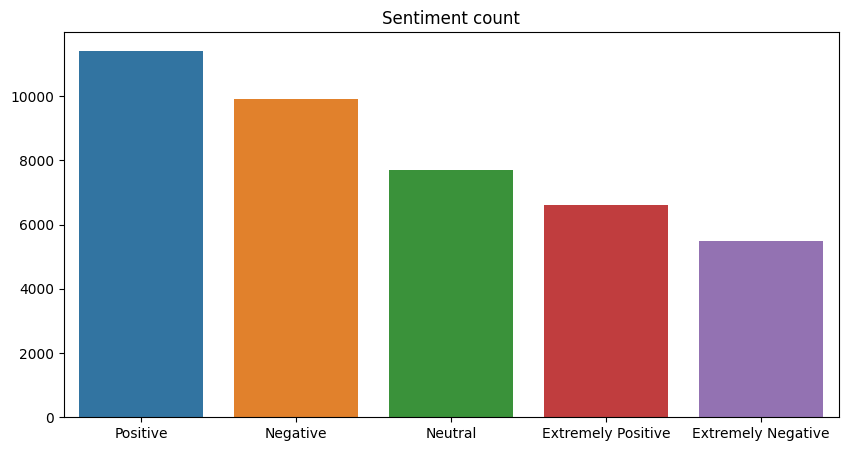

In [9]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment count")
plt.show()

Going deeper into tweet and sentiment

In [10]:
df[df['Sentiment']=='Positive'].loc[3,'OriginalTweet']

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [11]:
df[df['Sentiment']=="Extremely Positive"].loc[11,"OriginalTweet"]

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [12]:
df[df['Sentiment']=="Neutral"].loc[10,"OriginalTweet"]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [13]:
df[df['Sentiment']=="Neutral"].loc[16,"OriginalTweet"]

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

In [14]:
df[df['Sentiment']=="Extremely Negative"].loc[27,"OriginalTweet"]

'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [15]:
df[df['Sentiment']=="Extremely Negative"].loc[41130,"OriginalTweet"]

'Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂ\x92ve tested positive for COVID-19 and one in his area who died. He worries that the behavior of some shoppers is putting people in unnecessary danger.'

In [16]:
df[df['Sentiment']=="Negative"].loc[9,"OriginalTweet"]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

From above tweets we can see that there is no difference in Positive and Extremely Positive tweets or Negative and Extremely Negative Tweets.so we can combine them together as..

positive = extremely positive + positive

negative = extremely negative + negative

and then.. catagories them as 1 for positive,2 for neutral, 3 for negative.

In [17]:
df['Sentiment_cat'] = df['Sentiment'].replace({"Positive":3,'Negative':1,'Neutral':2,'Extremely Positive':3,'Extremely Negative':1})


In [18]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_cat
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


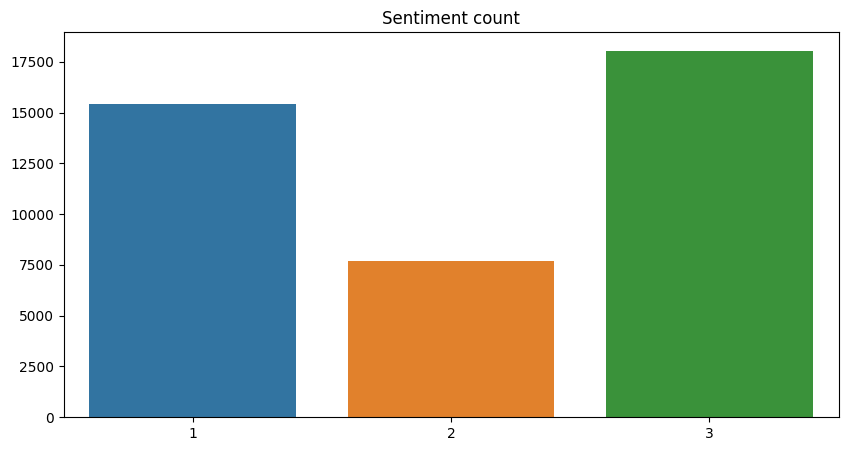

In [19]:
Sentiment_cat = df['Sentiment_cat'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=Sentiment_cat.index, y=Sentiment_cat.values)
plt.title("Sentiment count")
plt.show()

In [20]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [21]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')

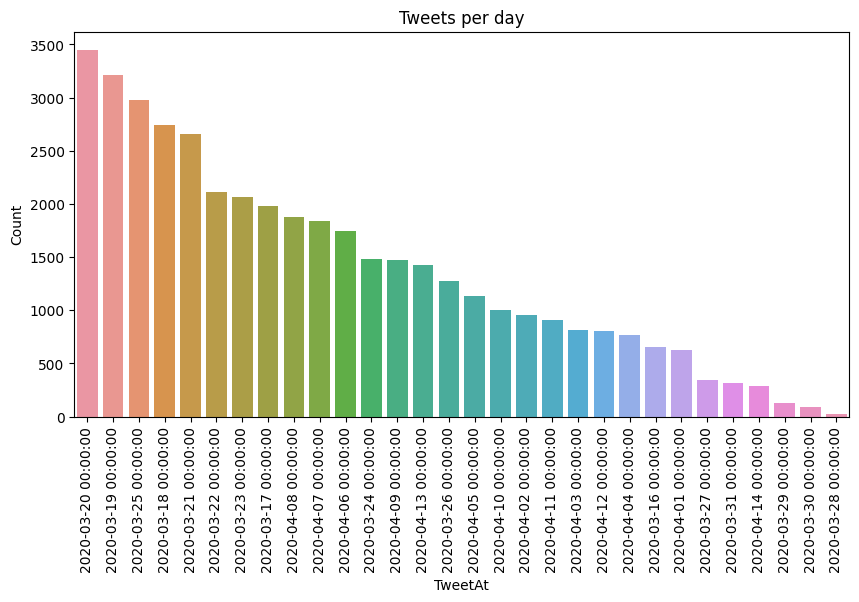

In [22]:
TweetAt_counts = df['TweetAt'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=TweetAt_counts.index, y=TweetAt_counts.values)
plt.xticks(rotation = 90)
plt.title("Tweets per day")
plt.ylabel("Count")
plt.xlabel("TweetAt")
plt.show()

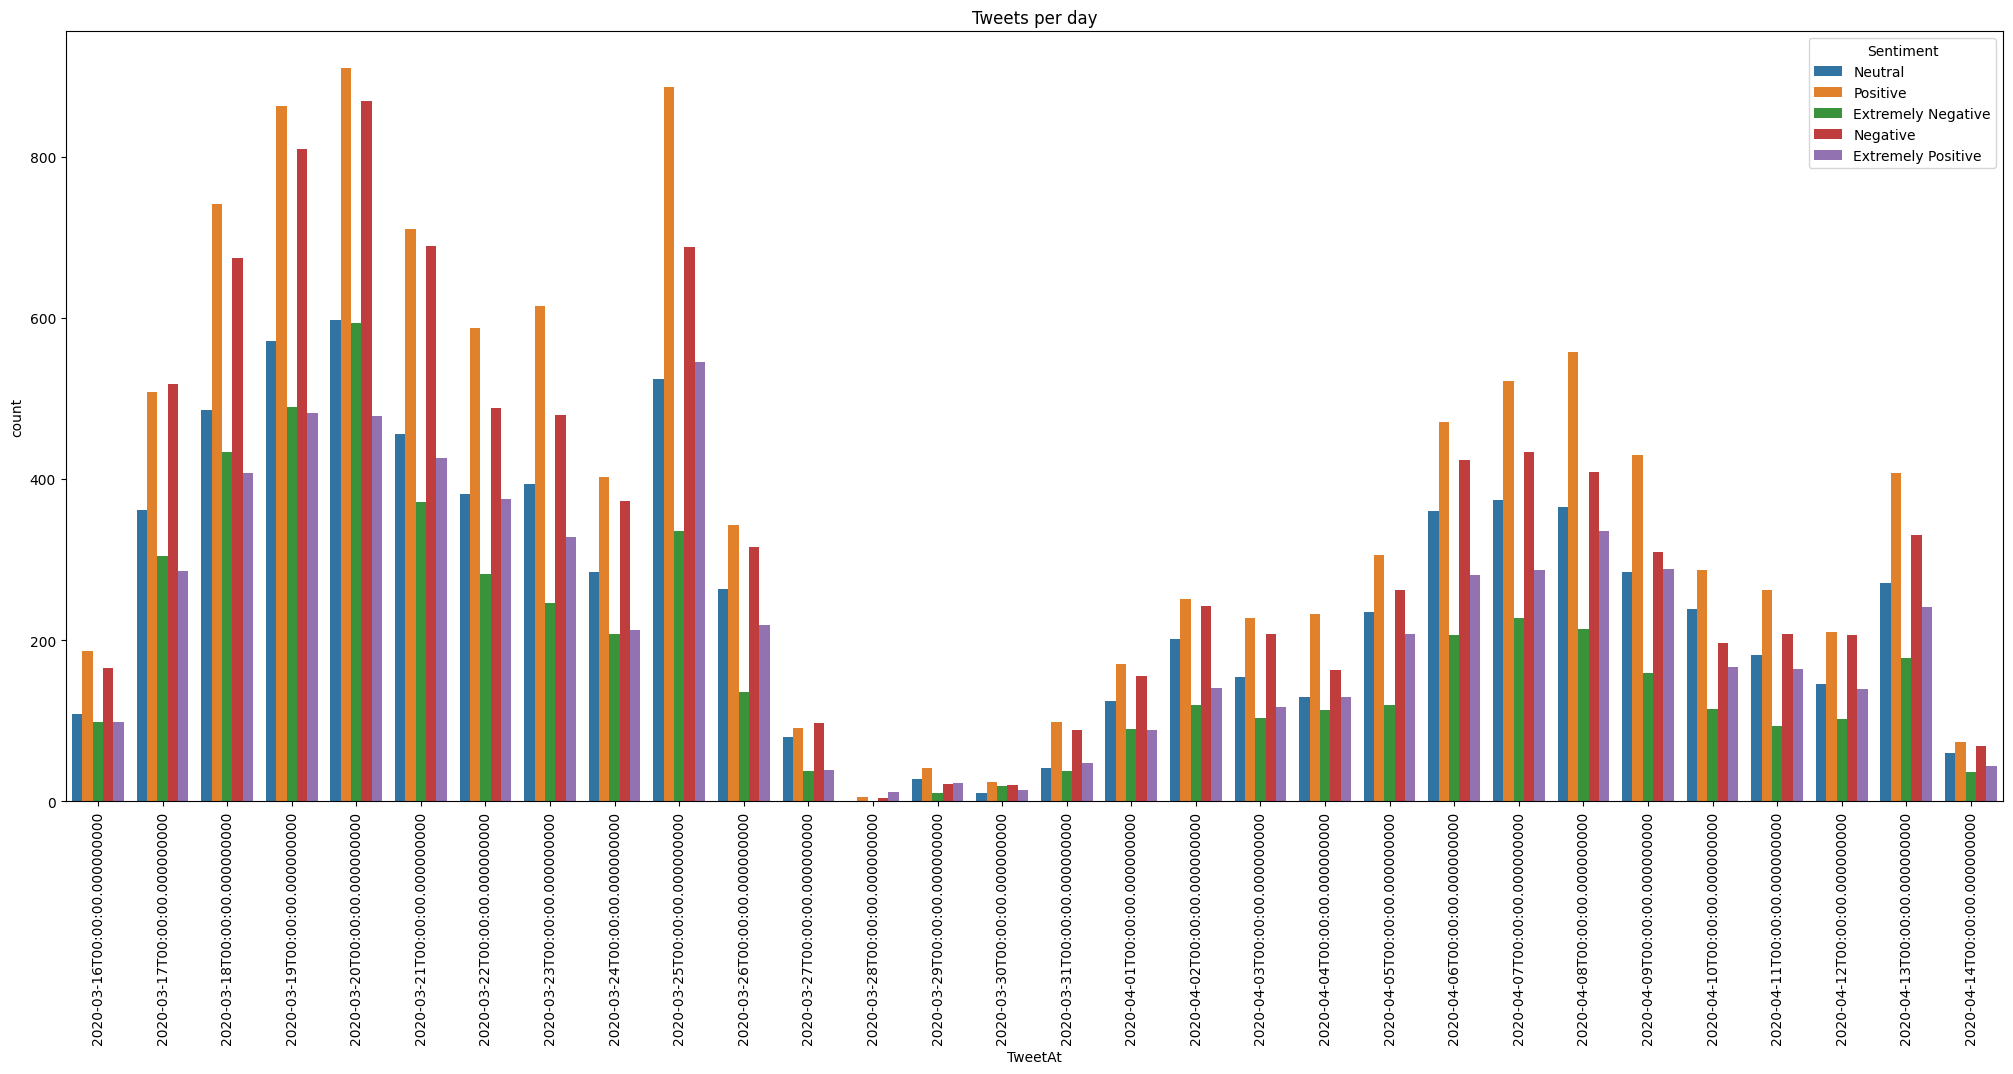

In [23]:
# sentiment wise count of tweets per day

plt.figure(figsize=(25, 10))
sns.countplot(x=df['TweetAt'], hue=df['Sentiment'])
plt.title('Tweets per day')
plt.xticks(rotation=90)
plt.show()

In [24]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [25]:
# top 10 locations

top_loc_df = pd.DataFrame(df.Location.value_counts().head(10))

In [26]:
top_loc_df.reset_index(inplace=True)

top_loc_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)

top_loc_df

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


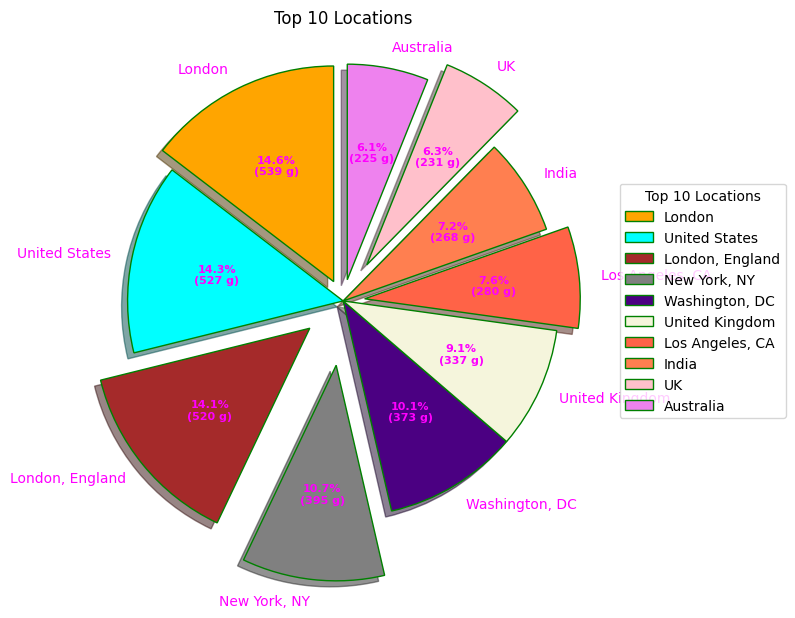

In [27]:

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1,0.0,0.2,0.1)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
        "grey", "indigo", "beige", "tomato","coral", "pink","violet")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(top_loc_df['Location_Count'],
                                autopct = lambda pct: func(pct, top_loc_df['Location_Count']),
                                explode = explode,
                                labels = top_loc_df['Location'],
                                shadow = True,
                                colors = colors,
                                startangle = 90,
                                wedgeprops = wp,
                                textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges, top_loc_df['Location'],
        title ="Top 10 Locations",
        loc ="center left",
        bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 10 Locations")

# show plot
plt.show()

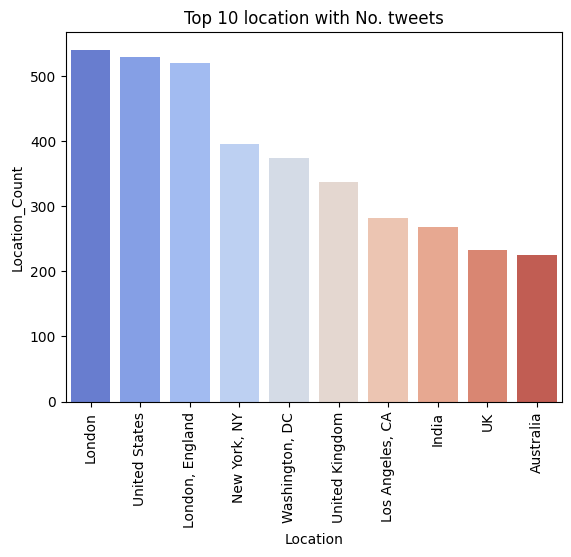

In [28]:
sns.barplot(x="Location", y="Location_Count", data=top_loc_df,
                 palette='coolwarm')
# sns.set_theme(style="darkgrid")
plt.title("Top 10 location with No. tweets")
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (5,5)

Country wise sentiment Analysis

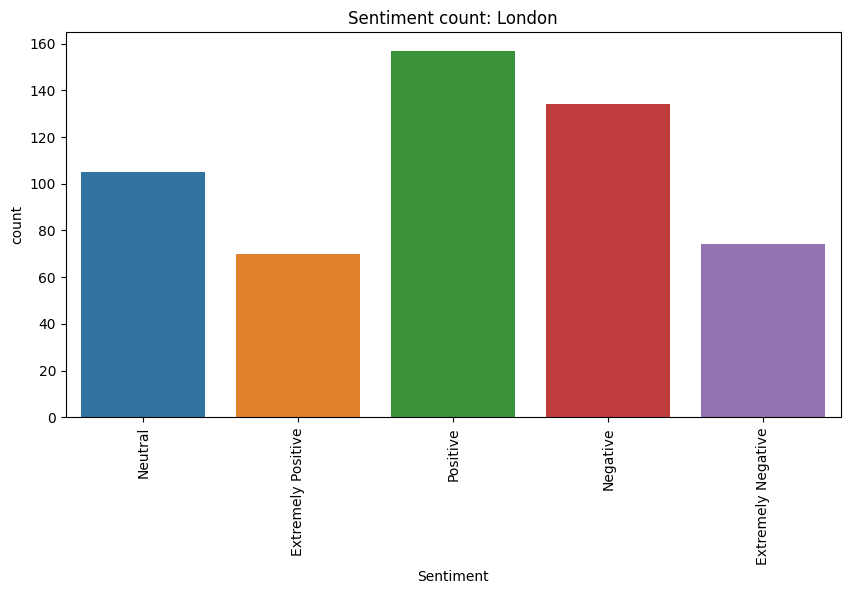

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'] == 'London'], x='Sentiment')
plt.title('Sentiment count: London')
plt.xticks(rotation=90)
plt.show()

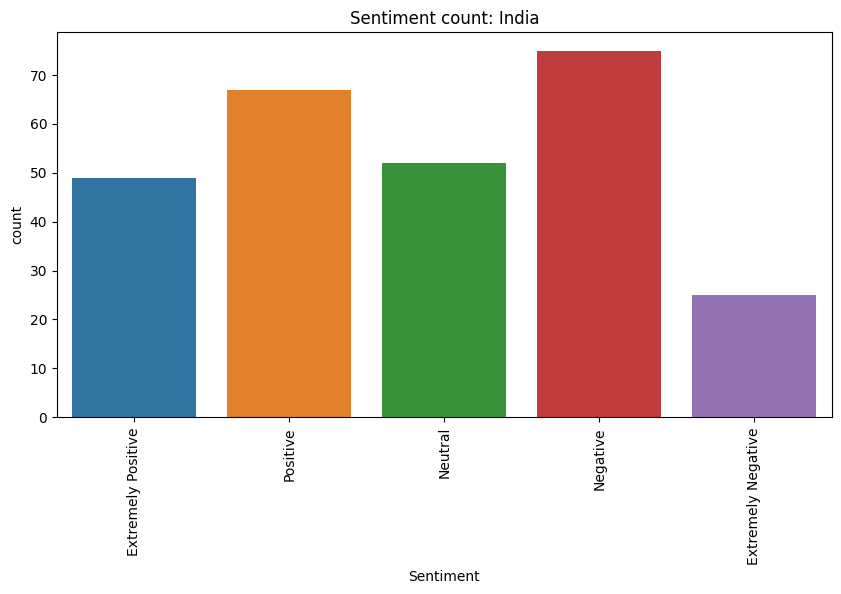

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'] == 'India'], x='Sentiment')
plt.title('Sentiment count: India')
plt.xticks(rotation=90)
plt.show()

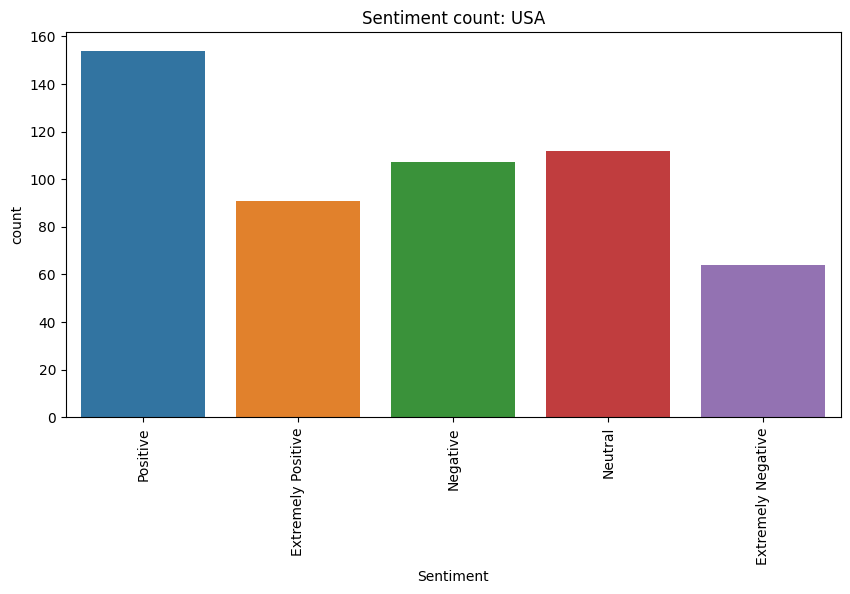

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="United States"], x = 'Sentiment')
plt.title('Sentiment count: USA')
plt.xticks(rotation=90)
plt.show()

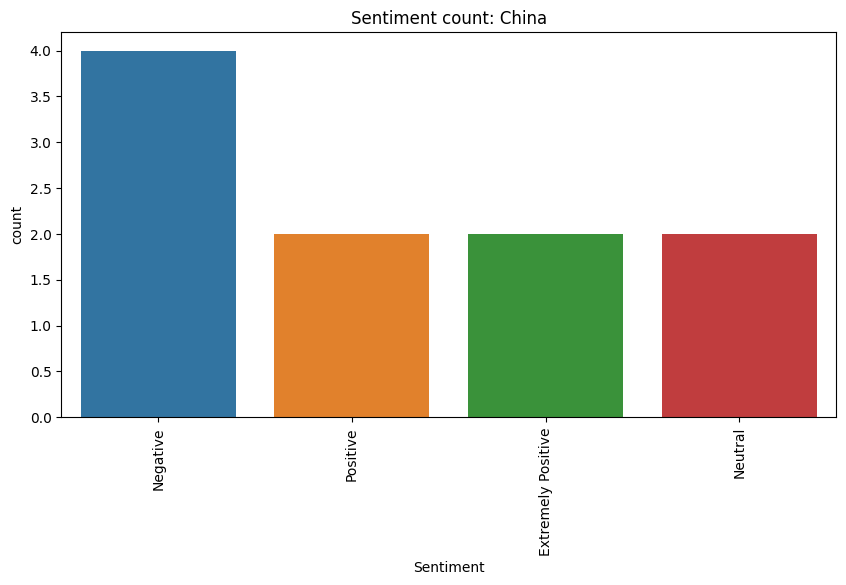

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="China"], x = 'Sentiment')
plt.title('Sentiment count: China')
plt.xticks(rotation=90)
plt.show()

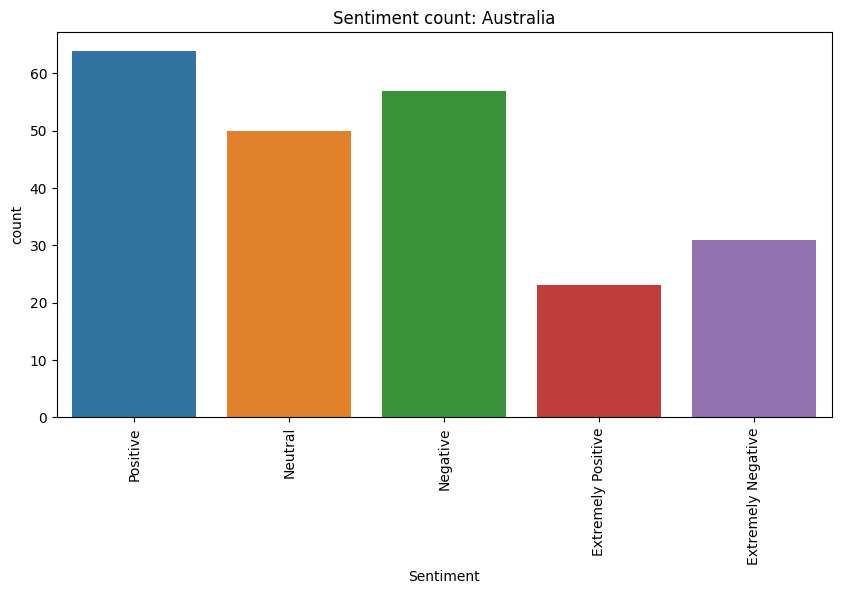

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="Australia"], x = 'Sentiment')
plt.title('Sentiment count: Australia')
plt.xticks(rotation=90)
plt.show()


# Data Processing and Cleaning

<b> Removing @Usernames </b>

In [34]:
df['OriginalTweet'].iloc[4117]

'#WestJet is lying. They are NOT lowering prices to get you out of the country.\r\r\n\r\r\nThese are screen shots for the same flight 2am 12pm 7pm\r\r\n #covid_19 #canada  @GlobalNational @globalnews @GlobalCalgary @CTVNews @CNN @JustinTrudeau https://t.co/pfEQVZVRf6'

In [35]:
def rem_user(tweet):
  a=[]
  for word in tweet.lower().split():
    if word.startswith('@'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [36]:
df['Tweets'] =df['OriginalTweet'].apply(rem_user) 

In [37]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight 2am 12pm 7pm #covid_19 #canada https://t.co/pfeqvzvrf6'

<b> Removing Links </b>

In [38]:
def rem_links(tweet):
  a=[]
  for word in tweet.lower().split():
    if word.startswith('https:') or word.startswith('http:'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [39]:
df['Tweets'] =df['Tweets'].apply(rem_links) 

In [40]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight 2am 12pm 7pm #covid_19 #canada'

<b> Removing digits and special characters </b>

In [41]:
import re
def rm_dig(tweet):
  a=[]
  for word in tweet.split():
    output = re.sub('[â£/0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [42]:
df['Tweets'] =df['Tweets'].apply(rm_dig) 

In [43]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight am pm pm #covid_ #canada'

<b> Removing stopwords and Punctuations </b>

In [44]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
import string
from nltk.corpus import stopwords

In [46]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [48]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [49]:
df['Tweets'] = df['Tweets'].apply(text_process)

In [50]:
df['Tweets'].iloc[4117]

'westjet lying lowering prices get country screen shots flight pm pm covid canada'

<b> Stemming

In [51]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
     return " ".join([stemmer.stem(word) for word in text.split()])

df['Tweets']=df['Tweets'].apply(stem_words)

In [52]:
df['Tweets'].iloc[4117]

'westjet lie lower price get countri screen shot flight pm pm covid canada'

<b> Lemmatization

In [53]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [54]:
df['Tweets']=df['Tweets'].apply(lemmatize_words)

In [55]:
df['Tweets'].iloc[4117]

'westjet lie low price get countri screen shot flight pm pm covid canada'

In [56]:
df['OriginalTweet'].iloc[4117]

'#WestJet is lying. They are NOT lowering prices to get you out of the country.\r\r\n\r\r\nThese are screen shots for the same flight 2am 12pm 7pm\r\r\n #covid_19 #canada  @GlobalNational @globalnews @GlobalCalgary @CTVNews @CNN @JustinTrudeau https://t.co/pfEQVZVRf6'

# Analysing Hashtags

In [57]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      stri+=word[1:]+','
  return stri[:-1]

In [58]:
df['hashtags'] = df['OriginalTweet'].apply(get_tags)

In [59]:
df["OriginalTweet"].iloc[25]

"UK #consumer poll indicates the majority expect #covid19's impact to last 4-12 months (at 12 March). We expect this to increase at the next #tracker... See full results of the @RetailX Coronavirus Consumer Confidence Tracker here: https://t.co/K3uJlcjqDB https://t.co/9G3kgqIXJ8"

In [60]:
df['Tweets'].iloc[25]

'uk consum poll indic major expect covid impact last month march expect increas next tracker see full result coronaviru consum confid tracker'

In [61]:
df['hashtags'].iloc[25]

"consumer,covid19's,tracker..."

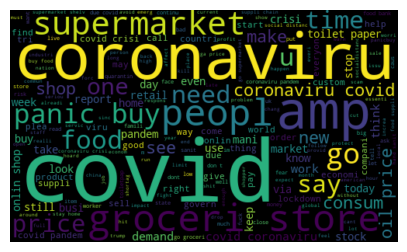

In [62]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==1]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

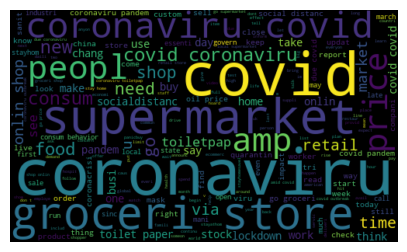

In [63]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==2]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

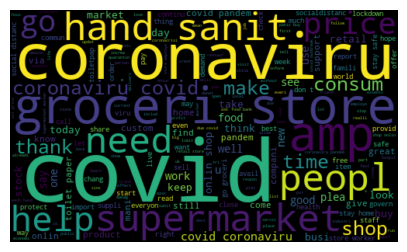

In [64]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==3]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [65]:
df['hashtags'].value_counts()


                                                          17541
coronavirus                                                2991
covid_19                                                    668
covid2019                                                   391
coronavirus,covid19                                         308
                                                          ...  
coronavirus,gopinsidertrading,trumplies                       1
lesson,toiletpaper,coronavirus,virus,toilet,meme,memes        1
covid_19,silverlinings                                        1
traderjoes.,coronavirus:                                      1
coronavirus,covid19,coronavirus                               1
Name: hashtags, Length: 15660, dtype: int64

# Model Training (for Multiclass Classification)

In [66]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 9)
test shape :  (8232, 9)


# Counter Vectorizer For Multi Class Classification

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 33214)
X_test.shape :  (8232, 33214)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


In [68]:
X_train.toarray()[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
y_train

array(['Neutral', 'Neutral', 'Extremely Negative', ..., 'Neutral',
       'Positive', 'Neutral'], dtype=object)

In [70]:
y_test

array(['Negative', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

# Naive Bayes Classifier for MULTICLASS Classification

In [71]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

y_pred = naiveByes_clf.predict(X_test)

In [72]:
train_accuracy = naiveByes_clf.score(X_train,y_train)
print("training accuracy Score    : ",train_accuracy)

NB_accuracy = accuracy_score(y_test,y_pred)
print("test accuracy Score : ",NB_accuracy )


print(classification_report(y_pred,y_test))

training accuracy Score    :  0.7047228549734245
test accuracy Score :  0.4686588921282799
                    precision    recall  f1-score   support

Extremely Negative       0.34      0.58      0.43       642
Extremely Positive       0.37      0.60      0.46       818
          Negative       0.53      0.42      0.47      2459
           Neutral       0.33      0.66      0.44       765
          Positive       0.63      0.41      0.50      3548

          accuracy                           0.47      8232
         macro avg       0.44      0.53      0.46      8232
      weighted avg       0.52      0.47      0.47      8232



# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [73]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [74]:
sgd_prediction = sgd_clf.predict(X_test)

print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))

sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Validation accuracy Score : ",sgd_accuracy )

print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.8457706909643128
Validation accuracy Score :  0.5638969873663752
                    precision    recall  f1-score   support

Extremely Negative       0.69      0.59      0.64      1278
Extremely Positive       0.70      0.65      0.67      1431
          Negative       0.42      0.49      0.46      1699
           Neutral       0.75      0.58      0.65      1994
          Positive       0.42      0.53      0.47      1830

          accuracy                           0.56      8232
         macro avg       0.60      0.57      0.58      8232
      weighted avg       0.59      0.56      0.57      8232



# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)

In [76]:
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9997266514806378
Validation accuracy Score :  0.5629251700680272
                    precision    recall  f1-score   support

Extremely Negative       0.38      0.69      0.49       606
Extremely Positive       0.34      0.72      0.47       627
          Negative       0.54      0.51      0.53      2076
           Neutral       0.77      0.62      0.69      1906
          Positive       0.66      0.50      0.57      3017

          accuracy                           0.56      8232
         macro avg       0.54      0.61      0.55      8232
      weighted avg       0.61      0.56      0.57      8232



# Support vector machine( For Multiclass Classification)

In [77]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9074259681093394
Validation accuracy Score :  0.607871720116618
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.73      0.59       747
Extremely Positive       0.54      0.77      0.63       926
          Negative       0.57      0.55      0.56      2060
           Neutral       0.70      0.65      0.67      1674
          Positive       0.67      0.54      0.60      2825

          accuracy                           0.61      8232
         macro avg       0.60      0.65      0.61      8232
      weighted avg       0.62      0.61      0.61      8232



# Logistic Regression(For Multiclass Classification)

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9063933181473045
Validation accuracy Score :  0.613581146744412
                    precision    recall  f1-score   support

Extremely Negative       0.62      0.68      0.65       998
Extremely Positive       0.62      0.71      0.66      1142
          Negative       0.55      0.56      0.55      1922
           Neutral       0.71      0.63      0.67      1722
          Positive       0.61      0.57      0.59      2448

          accuracy                           0.61      8232
         macro avg       0.62      0.63      0.62      8232
      weighted avg       0.62      0.61      0.61      8232



# CATBOOST MODEL (For Multiclass Classification)

In [79]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [80]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [81]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Training accuracy Score    :  0.66624145785877
Validation accuracy Score :  0.6231778425655977
                    precision    recall  f1-score   support

Extremely Negative       0.55      0.71      0.62       857
Extremely Positive       0.57      0.76      0.66       994
          Negative       0.53      0.59      0.56      1802
           Neutral       0.80      0.61      0.69      2036
          Positive       0.64      0.58      0.61      2543

          accuracy                           0.62      8232
         macro avg       0.62      0.65      0.63      8232
      weighted avg       0.64      0.62      0.63      8232



# Multiclass Classification Results

In [82]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy,catboost_accuracy]})
models.reset_index(inplace=True)
models.sort_values(by='Test accuracy', ascending=False)

,index,Model,Test accuracy
5,5,CatBoost,0.623178
1,1,Logistic Regression,0.613581
0,0,Support Vector Machines,0.607872
4,4,Stochastic Gradient Descent,0.563897
2,2,Random Forest,0.562925
3,3,Naive Bayes,0.468659


# CONVERTING MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION

In [83]:
new_df = df[['Tweets','Sentiment']]

In [84]:
new_df.head()

,Tweets,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock one empti plea dont panic enough fo...,Positive
4,readi go supermarket covid outbreak im paranoi...,Extremely Negative


In [85]:
new_df['Sentiment'] = new_df['Sentiment'].replace({'Positive':1,'Extremely Positive':1,'Negative':0,'Extremely Negative':0,"Neutral":0})

In [86]:
new_df.head()

,Tweets,Sentiment
0,,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronaviru australia woolworth give elderli di...,1
3,food stock one empti plea dont panic enough fo...,1
4,readi go supermarket covid outbreak im paranoi...,0


# Model Training

In [87]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 33127)
X_test.shape :  (8232, 33127)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


# Naive Bayes Classifier for BINARY Classification

In [89]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8652391799544419
Validation accuracy Score :  0.7758746355685131
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4730
           1       0.73      0.75      0.74      3502

    accuracy                           0.78      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.78      0.78      0.78      8232



# Random Forest Classifier for BINARY Classification

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9999392558845862
Validation accuracy Score :  0.8198493683187561
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4802
           1       0.77      0.81      0.79      3430

    accuracy                           0.82      8232
   macro avg       0.81      0.82      0.82      8232
weighted avg       0.82      0.82      0.82      8232



# Logistic Regression for BINARY Classification

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9424753227031132
Validation accuracy Score :  0.8554421768707483
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4831
           1       0.81      0.86      0.83      3401

    accuracy                           0.86      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.86      0.86      0.86      8232



# Catboost Algorithm for BINARY Classification

In [92]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [93]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Training accuracy Score    :  0.8838876233864844
Validation accuracy Score :  0.8469387755102041
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4999
           1       0.77      0.86      0.82      3233

    accuracy                           0.85      8232
   macro avg       0.84      0.85      0.84      8232
weighted avg       0.85      0.85      0.85      8232



# SVM for BINARY Classification

In [94]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9588458618071374
Validation accuracy Score :  0.8395286686103013
              precision    recall  f1-score   support

           0       0.91      0.83      0.86      5068
           1       0.76      0.86      0.80      3164

    accuracy                           0.84      8232
   macro avg       0.83      0.84      0.83      8232
weighted avg       0.85      0.84      0.84      8232



# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION) 

In [95]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9407441154138193
Validation accuracy Score :  0.8572643343051506
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4770
           1       0.82      0.85      0.83      3462

    accuracy                           0.86      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.86      0.86      0.86      8232



# BINARY CLASSIFICATION RESULTS

In [96]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Descent,0.857264
1,Logistic Regression,0.855442
5,CatBoost,0.846939
0,Support Vector Machines,0.839529
2,Random Forest,0.819849
3,Naive Bayes,0.775875


In [97]:
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_test)

[[17679   809]
 [ 1142 13295]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

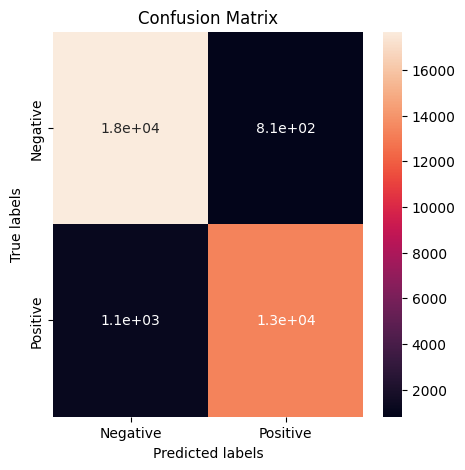

In [98]:
labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Conclusion

<h2> Multiclass Sentiment Classification</h2>

    CatBoost: 62.32%
    Logistic Regression: 61.36%
    SVM: 60.79%
    SGD: 56.39%
    Random Forest: 56.29%
    Naive Bayes: 46.87%

<h2> Binary Sentiment Classification</h2>

    SGD: 85.73%
    Logistic Regression: 85.54%
    CatBoost: 84.69%
    SVM: 83.95%
    Random Forest: 81.98%
    Naive Bayes: 77.59%